#UJIAN AKHIR SEMESTER BIG DATA MINING
Nama : NANDA PRATAMA <br>
Nim  : 22.11.4623 <br>
Kelas : BDDM 8

# Data Preprocessing

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive

# Load dataset
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/Big Data/Uas/cardio_train.csv"
dataset = pd.read_csv(file_path)

Mounted at /content/drive


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Preprocessing: Map categorical values to numeric
binary_mapping = {'Yes': 1, 'No': 0, 'Positive': 1, 'Negative': 0}
binary_columns = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Outcome Variable']  # Sesuaikan nama kolom ini
for col in binary_columns:
    if col in dataset.columns:
        dataset[col] = dataset[col].map(binary_mapping)

gender_mapping = {'Male': 1, 'Female': 0}
if 'Gender' in dataset.columns:
    dataset['Gender'] = dataset['Gender'].map(gender_mapping)

bp_mapping = {'Low': 0, 'Normal': 1, 'High': 2}
cholesterol_mapping = {'Low': 0, 'Normal': 1, 'High': 2}
if 'Blood Pressure' in dataset.columns:
    dataset['Blood Pressure'] = dataset['Blood Pressure'].map(bp_mapping)
if 'Cholesterol Level' in dataset.columns:
    dataset['Cholesterol Level'] = dataset['Cholesterol Level'].map(cholesterol_mapping)

# Check for duplicates
duplicates = dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Class imbalance check
if 'Outcome Variable' in dataset.columns:
    class_distribution = dataset['Outcome Variable'].value_counts(normalize=True)
    print("\nClass Distribution (Outcome Variable):")
    print(class_distribution)


Number of duplicate rows: 0


In [7]:
# Menghapus duplikasi
dataset_cleaned = dataset.drop_duplicates()

# Mengecek jumlah baris setelah duplikasi dihapus
print(f"Jumlah baris setelah menghapus duplikasi: {len(dataset_cleaned)}")

Jumlah baris setelah menghapus duplikasi: 70000


In [8]:
dataset.head()

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0


# Feature Selection

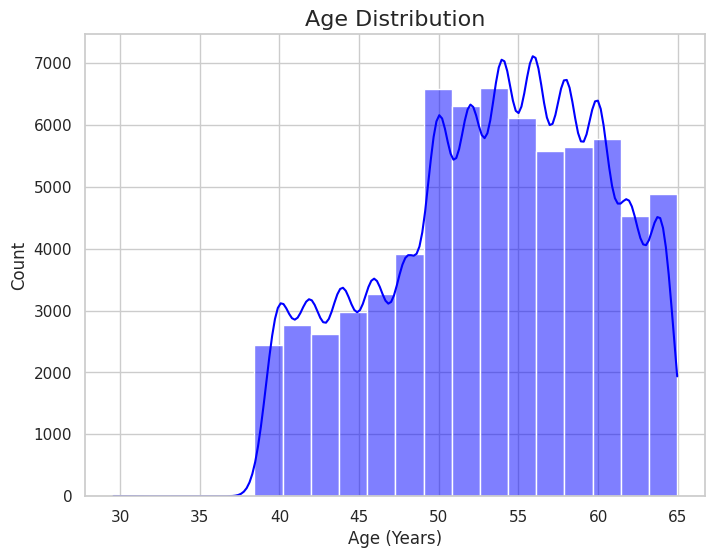

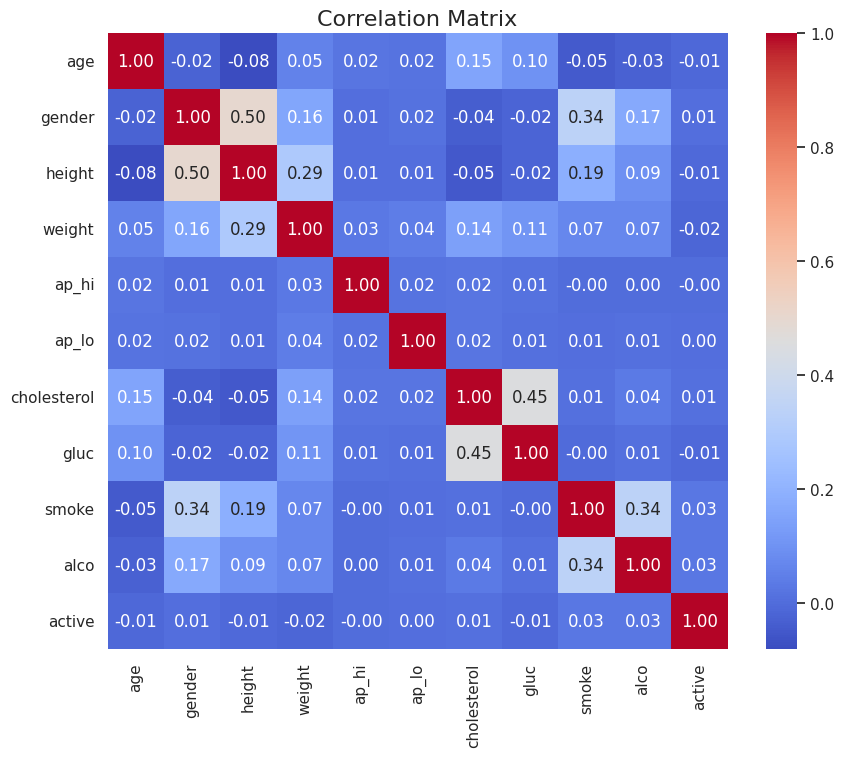

<ipython-input-9-eb93bbb7ccfe>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cardio', data=dataset, palette='pastel')


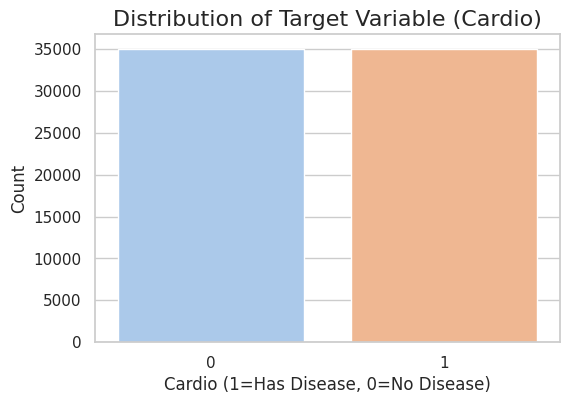

<ipython-input-9-eb93bbb7ccfe>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=dataset, palette='pastel')


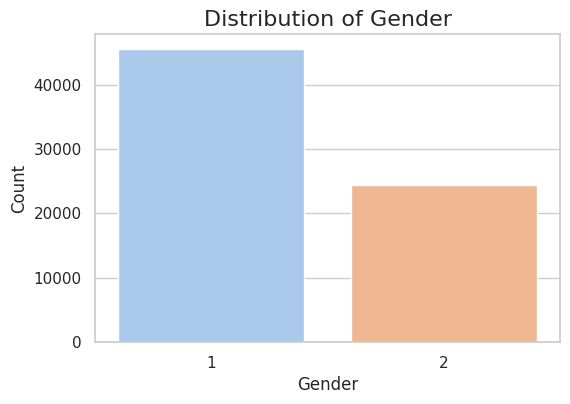

<ipython-input-9-eb93bbb7ccfe>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=dataset, palette='pastel')


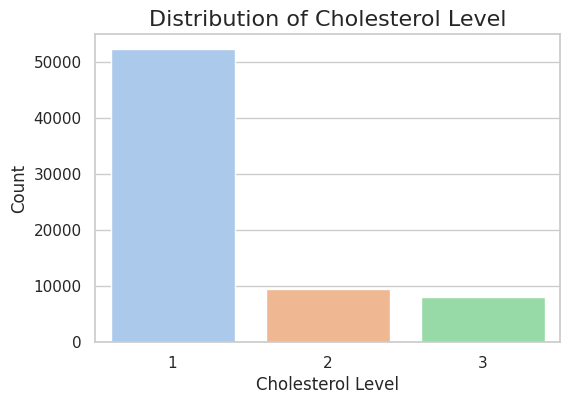

<ipython-input-9-eb93bbb7ccfe>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=dataset, palette='pastel')


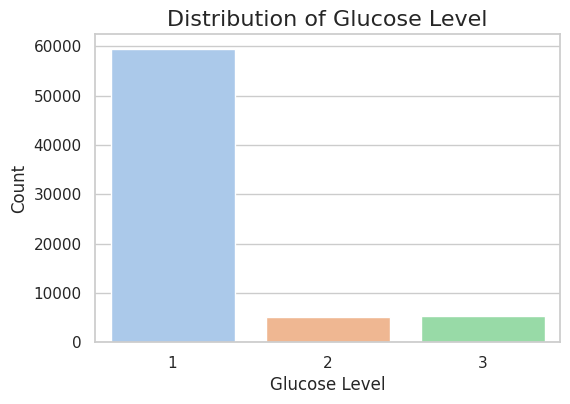

<ipython-input-9-eb93bbb7ccfe>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=dataset, palette='pastel')


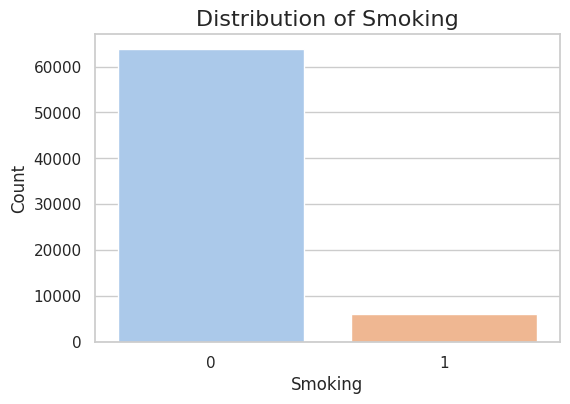

<ipython-input-9-eb93bbb7ccfe>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=dataset, palette='pastel')


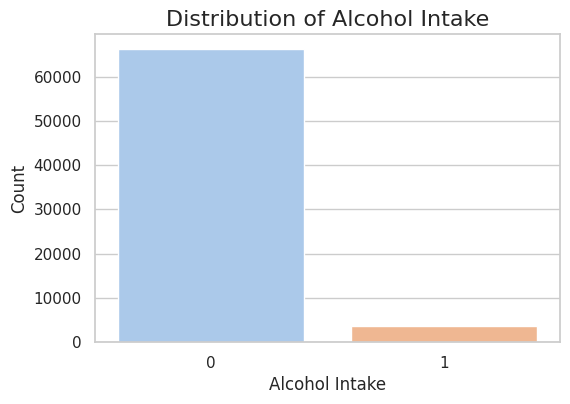

<ipython-input-9-eb93bbb7ccfe>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=dataset, palette='pastel')


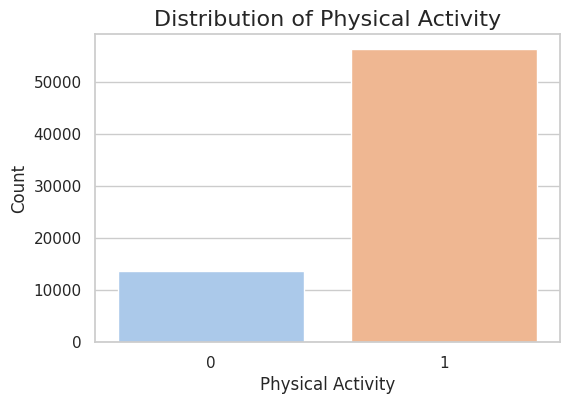

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset_path = '/content/drive/MyDrive/Big Data/Uas/cardio_train.csv'
dataset = pd.read_csv(dataset_path, sep=';')

# Set style for plots
sns.set(style="whitegrid")

# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(dataset['age'] / 365, kde=True, bins=20, color="blue")  # Age converted to years
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = dataset.drop(columns=["id", "cardio"]).corr()  # Exclude id and target column
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.show()

# Count plot for cardio (target variable)
plt.figure(figsize=(6, 4))
sns.countplot(x='cardio', data=dataset, palette='pastel')
plt.title('Distribution of Target Variable (Cardio)', fontsize=16)
plt.xlabel('Cardio (1=Has Disease, 0=No Disease)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Visualizing categorical features
categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
feature_names = {
    'gender': 'Gender',
    'cholesterol': 'Cholesterol Level',
    'gluc': 'Glucose Level',
    'smoke': 'Smoking',
    'alco': 'Alcohol Intake',
    'active': 'Physical Activity'
}

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, data=dataset, palette='pastel')
    plt.title(f'Distribution of {feature_names[feature]}', fontsize=16)
    plt.xlabel(feature_names[feature], fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()


# Data Modeling - Decision Tree & Random Forest

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
dataset_cleaned = pd.read_csv("/content/drive/MyDrive/Big Data/Uas/cardio_train.csv", sep=';')  # Add sep=';'

# Check if the columns exist (important!)
# Assuming 'cardio' is the target variable column in your original dataset
# and there's no 'Disease' column
if "cardio" not in dataset_cleaned.columns:
    raise ValueError("Target variable column 'cardio' not found in the dataset.")

# Pisahkan fitur dan target
# Adjust column names according to your dataset
X = dataset_cleaned.drop(columns=["cardio"])  # Remove target variable
y = dataset_cleaned["cardio"]  # Target variable

# Split dataset ke training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluasi Model
print("Decision Tree Performance:")
print(classification_report(y_test, dt_predictions))
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_predictions))

print("\nRandom Forest Performance:")
print(classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.64      0.63      0.63      6988
           1       0.63      0.64      0.64      7012

    accuracy                           0.64     14000
   macro avg       0.64      0.64      0.64     14000
weighted avg       0.64      0.64      0.64     14000

Accuracy: 0.6354285714285715
Confusion Matrix:
[[4384 2604]
 [2500 4512]]

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.72      0.75      0.73      6988
           1       0.74      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000

Accuracy: 0.7270714285714286
Confusion Matrix:
[[5257 1731]
 [2090 4922]]


# Model Evaluasi - Membuat Model Baru (XGBoost)

In [16]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Split data (assuming X and y are already prepared from previous steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print("XGBoost Performance:")
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:37:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Performance:
Accuracy: 0.7331428571428571
Confusion Matrix:
[[5370 1618]
 [2118 4894]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      6988
           1       0.75      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000

